In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
df = pd.read_excel('Erfassungsliste_Mohn.xlsx')
df = df.rename(columns={"Winter-/Sommermohn/Klatschmohn(Referenzfläche)": "Sorte"})
df['Betrieb'] = 'CKA'
df.head()

,Betrieb,Fläche,Sorte,Einsaatjahr Mohn,Mohnsorte,Datum,Ordnung,Familie,Unterfamilie,Gattung,Epitheton,Erstbeschreiber..Datum.,Status,Geschlecht
0,CKA,NaN,Wintermohn,2018,Zeno Morphex,2019-06-03,"Hymenoptera, Hautflügler","Apidae, Bienen",NaN,Apis,mellifera,Carolin Gilgenbach; 17.06.2019,NaN,weiblich
1,CKA,NaN,Wintermohn,2018,Zeno Morphex,2019-06-03,"Hymenoptera, Hautflügler","Apidae, Bienen",NaN,Apis,mellifera,Carolin Gilgenbach; 17.06.2019,NaN,weiblich
2,CKA,NaN,Wintermohn,2018,Zeno Morphex,2019-06-03,"Hymenoptera, Hautflügler","Apidae, Bienen",NaN,Apis,mellifera,Carolin Gilgenbach; 17.06.2019,NaN,weiblich
3,CKA,NaN,Wintermohn,2018,Zeno Morphex,2019-06-03,"Hymenoptera, Hautflügler","Apidae, Bienen",NaN,Apis,mellifera,Carolin Gilgenbach; 17.06.2019,NaN,weiblich
4,CKA,NaN,Wintermohn,2018,Zeno Morphex,2019-06-03,"Hymenoptera, Hautflügler","Apidae, Bienen",NaN,Apis,mellifera,Carolin Gilgenbach; 17.06.2019,NaN,weiblich


In [4]:
df['Familie'].unique()

array(['Apidae, Bienen', 'Syrphidae', 'Sonstige', 'Muscidae',
       'Chrysopidae', 'Scarabaeidar', nan], dtype=object)

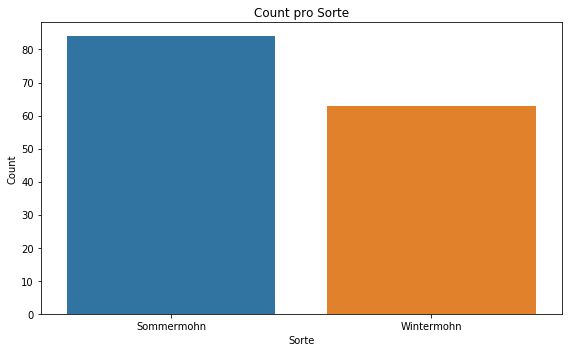

In [5]:
fig, ax = plt.subplots(1, figsize=(8, 5))
sns.barplot(
    data=df.groupby(['Sorte']).count().reset_index(),
    x='Sorte',
    y='Betrieb',
    ax=ax
)
plt.title('Count pro Sorte')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('sorte_count.png', dpi=350, pad_inches=0.1)
plt.show()

In [6]:
df.groupby(['Sorte', 'Ordnung']).count()['Betrieb']

Sorte       Ordnung                 
Sommermohn  Diptera, Zweiflügler        58
            Hymenoptera, Hautflügler    25
            Neuroptera, Netzflügler      1
Wintermohn  Coleoptera                   3
            Diptera, Zweiflügler        32
            Hymenoptera, Hautflügler    27
            Neuroptera, Netzflügler      1
Name: Betrieb, dtype: int64

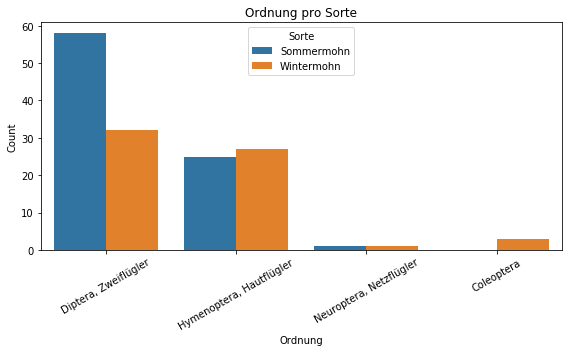

In [7]:
fig, ax = plt.subplots(1, figsize=(8, 5))
sns.barplot(
    data=df.groupby(['Sorte', 'Ordnung']).count().reset_index(),
    x='Ordnung',
    y='Betrieb',
    hue='Sorte',
    ax=ax
)
plt.title('Ordnung pro Sorte')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('ordnung_pro_sorte.png', dpi=350, pad_inches=0.2)
plt.show()

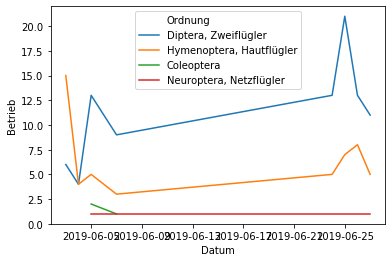

In [8]:
sns.lineplot(
    data=df.groupby(['Datum', 'Ordnung']).count().reset_index(),
    x='Datum',
    y='Betrieb',
    hue='Ordnung',
)
plt.show()

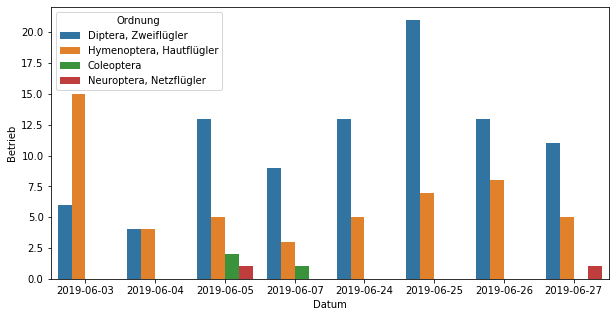

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))

date_df = df.groupby(['Datum', 'Ordnung']).count()['Betrieb'].reset_index()
date_df['Datum'] = date_df['Datum'].map(lambda x: x.strftime('%Y-%m-%d'))

sns.barplot(
    data=date_df,
    x='Datum',
    y='Betrieb',
    hue='Ordnung',
    ax=ax,
)
plt.show()

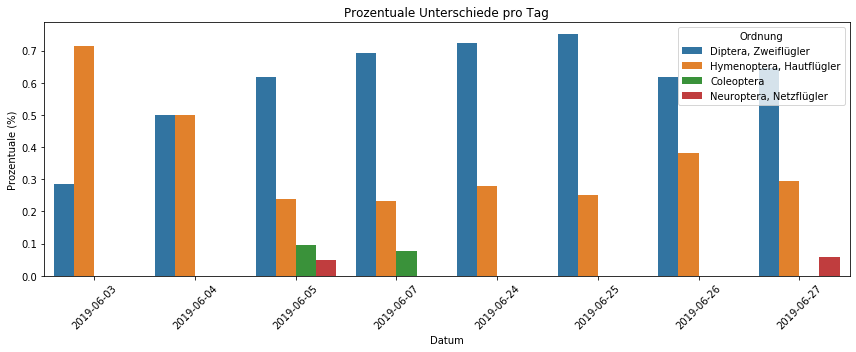

In [10]:
date_norm_df = df.groupby(['Datum', 'Ordnung']).count()

y = df.groupby(['Datum']).count()['Betrieb']

date_norm_df['norm'] = [
    value / y[timestamp]
    for (timestamp, species), value in date_norm_df['Betrieb'].iteritems()
]

fig, ax = plt.subplots(1,1,figsize=(12, 5))

date_norm_df = date_norm_df.reset_index()
date_norm_df['Datum'] = date_norm_df['Datum'].map(lambda x: x.strftime('%Y-%m-%d'))

sns.barplot(
    data=date_norm_df,
    x='Datum',
    y='norm',
    hue='Ordnung',
    ax=ax,
)
plt.title('Prozentuale Unterschiede pro Tag')
plt.ylabel('Prozentuale (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('prozentuale_unterschiede_pro_tag.png', dpi=350, pad_inches=0.1)
plt.show()

In [11]:
def plot_my_family(genus):
    fig, ax = plt.subplots(1,1,figsize=(12, 5))

    sns.barplot(
        data=df[df['Familie'] \
                .map(lambda x: isinstance(x, str) and x.startswith(genus))] \
                .groupby('Gattung').count()['Betrieb'] \
                .reset_index() \
                .sort_values(['Betrieb'], ascending=False),
        x='Gattung',
        y='Betrieb'
    )

    plt.title(f'{genus} Häufigkeiten', size=18)
    plt.ylabel('Häufigkeiten')
    plt.xlabel(genus)
    plt.tight_layout()
    plt.savefig(f'{genus.lower()}_gattungen.png', dpi=350, pad_inches=0.1)
    plt.show()

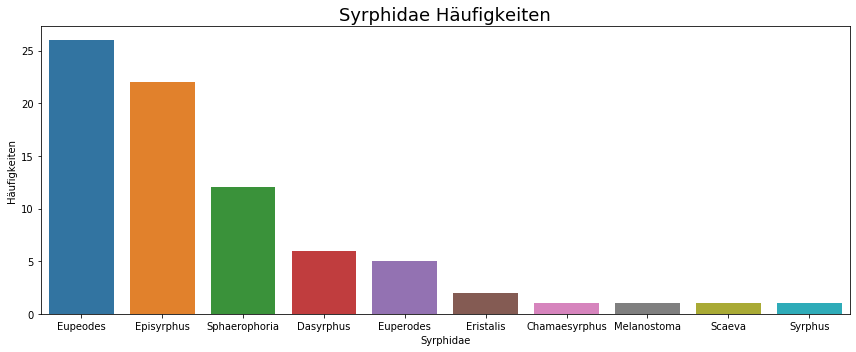

In [12]:
plot_my_family('Syrphidae')

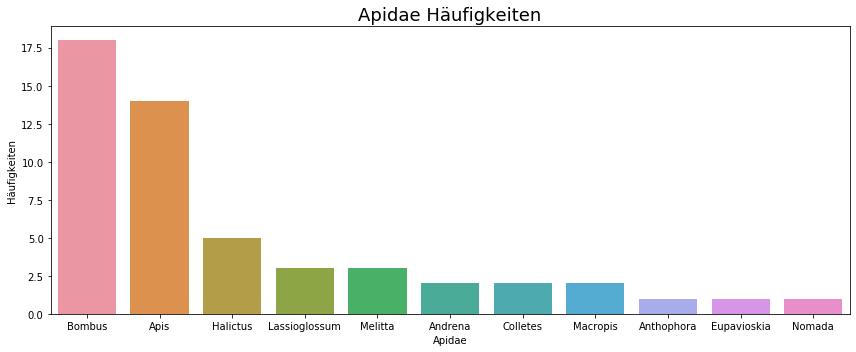

In [13]:
plot_my_family('Apidae')

In [14]:
def plot_my_family_by_month(genus):
    fig, ax = plt.subplots(1,1,figsize=(12, 5))

    sns.barplot(
        data=df[df['Familie'] \
                .map(lambda x: isinstance(x, str) and x.startswith(genus))] \
                .groupby(['Sorte', 'Gattung']).count()['Betrieb'] \
                .reset_index() \
                .sort_values(['Betrieb'], ascending=False),
        x='Gattung',
        y='Betrieb',
        hue='Sorte',
    )

    plt.title(f'{genus} Häufigkeiten pro Sorte', size=18)
    plt.ylabel('Häufigkeiten')
    plt.xlabel(genus)
    plt.tight_layout()
    plt.savefig(f'{genus.lower()}_sorte_gattungen.png', dpi=350, pad_inches=0.1)
    plt.show()

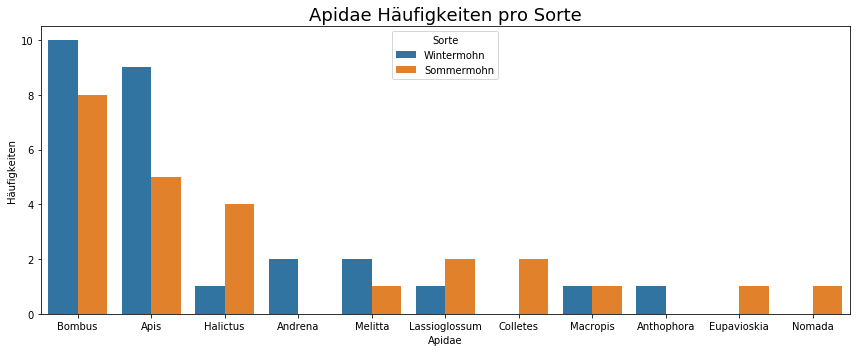

In [15]:
plot_my_family_by_month('Apidae')

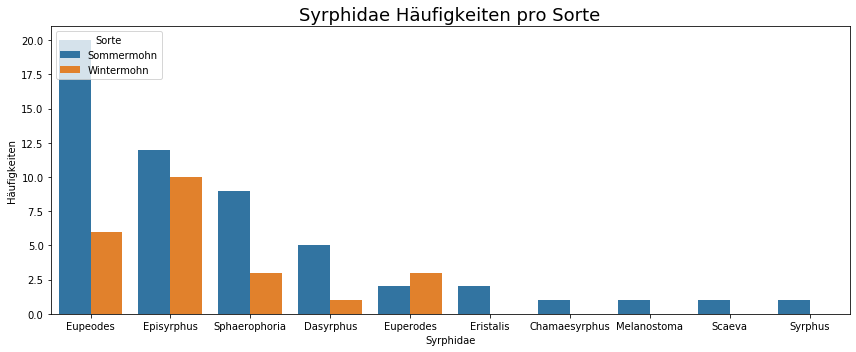

In [16]:
plot_my_family_by_month('Syrphidae')